# LFY031
## Föreläsning 5 - Regression
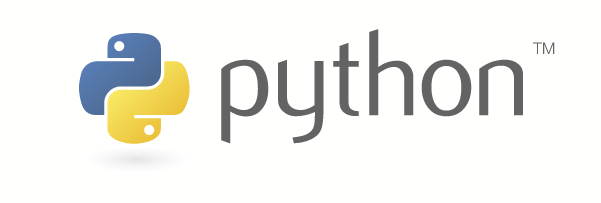
Fredrik Skärberg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn #Modul som har många funktioner för grundläggande maskininlärning.


* Maskininlärning innebär att datorn lär sig genom att studera data och statistik.

* Maskininlärning är ett program som analyserar data och lär sig att förutsäga resultat.

Låt oss nu börja studera enklare fall av maskininlärning innan vi går vidare till neurala nätverk.

### Första fallet: vi har en variabel.

Det vill säga, vi har många observationer av någonting. Kanske en temperatur, eller en vikt etc.

In [2]:
#1000 tal från en slumpmässig fördelning
n = 1000
data = np.random.normal(0, 1, n) + np.random.weibull(1, n)*np.random.choice([-1, 0.1], n)

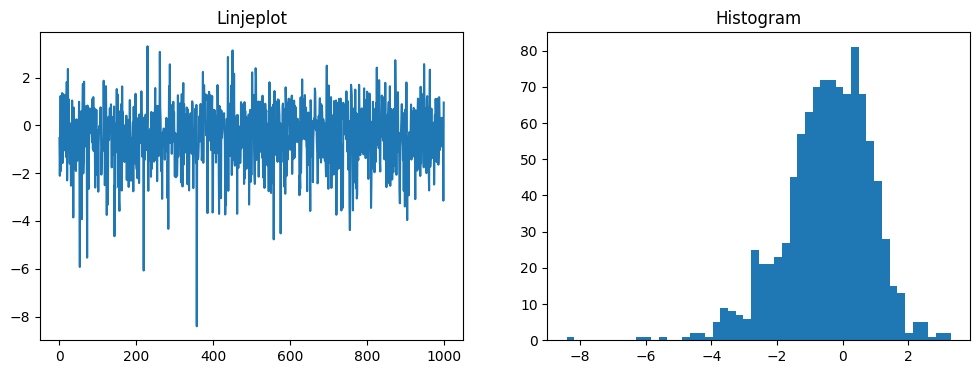

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Linjeplot')
plt.plot(data)
plt.subplot(122)
plt.title('Histogram')
plt.hist(data, bins=50)
plt.show()

Vad kan vi säga om datan? Vanligtvis börjar man med att studera medelvärdet, standardavvikelsen, medianen, max, min, med mera.

Medelvärde: -0.45535189345302796, Median: -0.31685424307307175


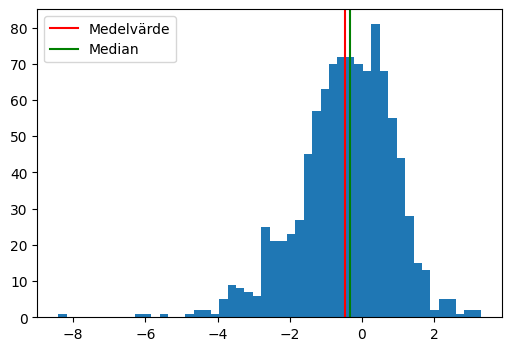

In [4]:
mean = np.mean(data)
median = np.median(data)
print(f"Medelvärde: {mean}, Median: {median}")

#Visa vart medelvärdet och medianen ligger i histogrammet
plt.figure(figsize=(6, 4))
plt.hist(data, bins=50)
plt.axvline(mean, color='red', label='Medelvärde')
plt.axvline(median, color='green', label='Median')
plt.legend()
plt.show()

5:e percentilen: -2.7390549841319625, 95:e percentilen: 1.3878549182119537, Standardavvikelse: 1.3264581677517382


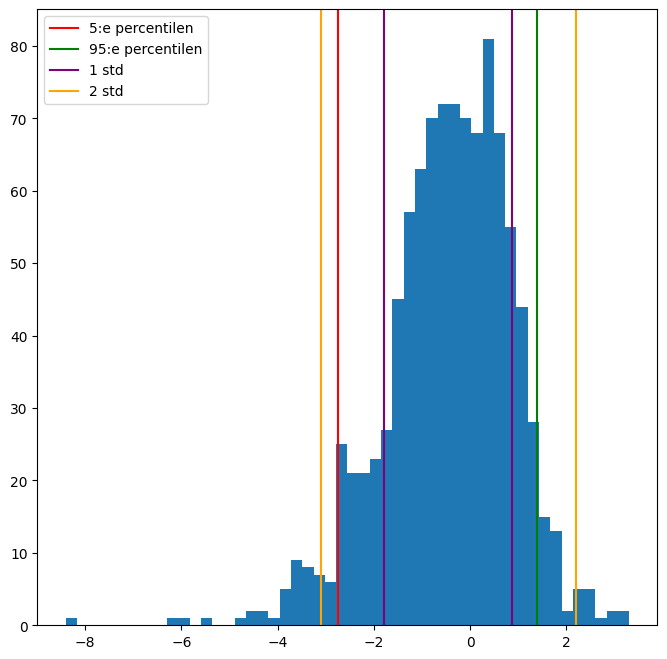

In [5]:
p5 = np.percentile(data, 5)
p95 = np.percentile(data, 95)
std = np.std(data)
print(f"5:e percentilen: {p5}, 95:e percentilen: {p95}, Standardavvikelse: {std}")

#Visa vart 5:e och 95:e percentilen och 1std och 2std ligger i histogrammet
plt.figure(figsize=(8, 8))
plt.hist(data, bins=50)
plt.axvline(p5, color='red', label='5:e percentilen')
plt.axvline(p95, color='green', label='95:e percentilen')
plt.axvline(mean+std, color='purple', label='1 std')
plt.axvline(mean-std, color='purple')
plt.axvline(mean+std*2, color='orange', label='2 std')
plt.axvline(mean-std*2, color='orange')
plt.legend()
plt.show()

### Andra fallet: vi har två variabler.

Dvs. vi har två variabler som vi har observerat, kanske kan det vara vikt och längd. Men det måste inte heller vara något samband.

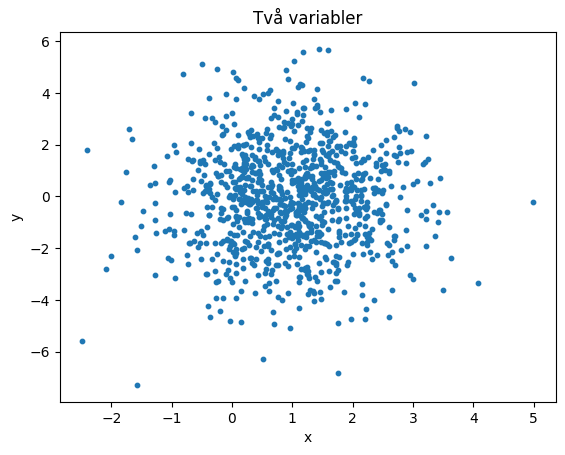

In [6]:
#Två stycken normalfördelade variabler
xn = np.random.normal(1, 1, n)
yn = np.random.normal(0, 2, n)

#En scatterplot kan vara ett bra sätt att visualisera 2 variabler på.
plt.scatter(xn, yn, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Två variabler')
plt.show()


Okej, men om det inte finns något samband mellan två variabler? Då är korrelationen 0. Och vi kan inte göra någon vettig analys av datan.

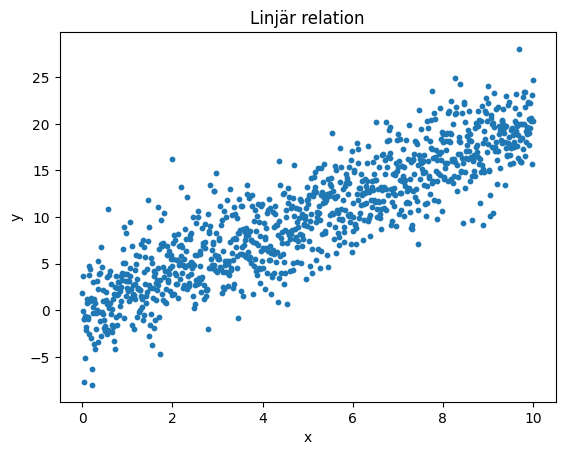

In [7]:
x = np.linspace(0, 10, n)
y = 2*x + np.random.normal(0, 3, n)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär relation')
plt.show()

Här har vi ett tydligt linjärt samband mellan *x* och *y* och vi kan göra en linjär regression. Dvs. hitta paramterarna *a* och *b*: y = a*x + b

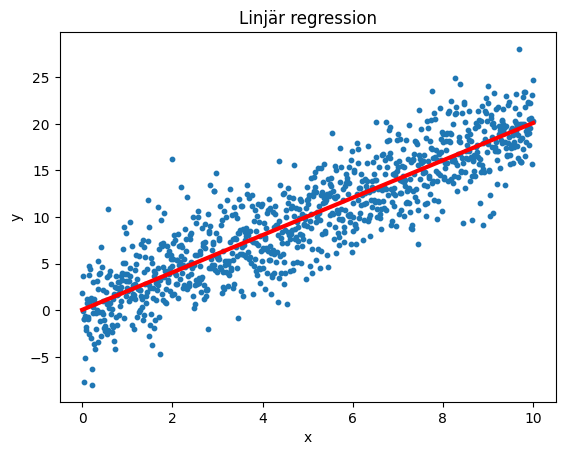

In [8]:
#Skapa en linjär regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Träna modellen
model.fit(x.reshape(-1, 1), y)

#Prediktera
y_pred = model.predict(x.reshape(-1, 1))

plt.scatter(x, y, s=10)
#En linje för prediktionerna
plt.plot(x, y_pred, color='red', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär regression')
plt.show()

Det finns många mått man kan använda för att avgöra om anpassningen är bra eller inte. Ett av de vanligaste är R^2.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Där:
•  ( $y_i$ ) är de observerade värdena.

•  ( $\hat{y}_i$ ) är de förutsagda värdena från modellen.

•  ( $\bar{y}$ ) är medelvärdet av de observerade värdena.

•  ( $n$ ) är antalet observationer.

Denna formel visar hur mycket av variationen i den beroende variabeln som förklaras av modellen jämfört med den totala variationen.

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R2: {r2*100:.2f}%") #R2 är ett mått på hur bra modellen är, 100% är perfekt.


R2: 78.16%


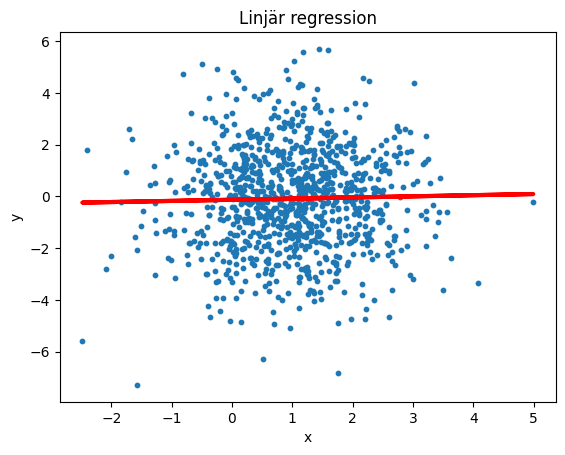

R2: 0.05%


In [10]:
#Gör en linjär regression på xn och yn
model.fit(xn.reshape(-1, 1), yn)
yn_pred = model.predict(xn.reshape(-1, 1))

plt.scatter(xn, yn, s=10)
plt.plot(xn, yn_pred, color='red', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär regression')
plt.show()

r2 = r2_score(yn, yn_pred)
print(f"R2: {r2*100:.2f}%") #R2 är ett mått på hur bra modellen är, 100% är perfekt.

Självklart är det så att vi inte alltid har något som följer linjärt mellan alla datapunkter även om det finns ett samband.
I detta fallet pratar vi om polynomial regression. Då kan vi använda oss av en grad 2-n-polynom för att passa in datan. 

Ett exempel på en sådan ekvation är:

$$y = a*x^2 + b*x + c$$

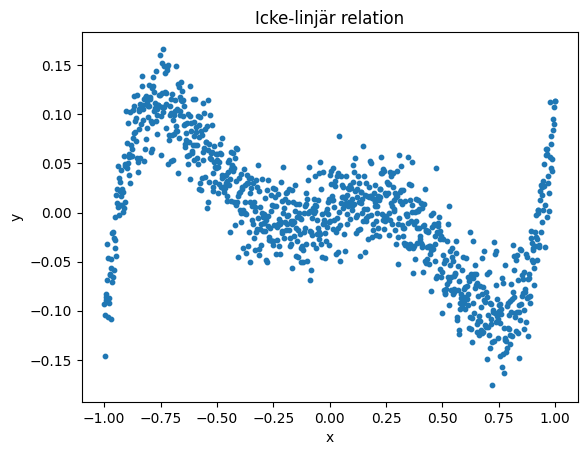

In [11]:
x = np.linspace(-1, 1, n)
#En icke-linjär relation. Ett femtegradspolynom
y = x**5 - x**3 + x/10 + np.random.normal(0, 0.025, n)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Icke-linjär relation')
plt.show()


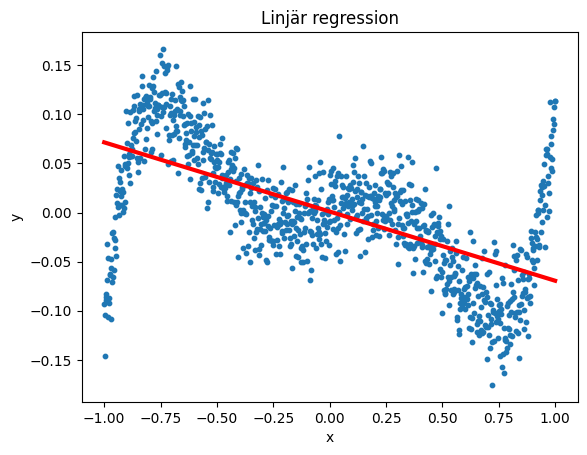

R2: 40.00%


In [12]:
#Om vi gör en linjär regression på denna data så kommer det inte bli så superbra.
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='red', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linjär regression')
plt.show()

r2 = r2_score(y, y_pred)
print(f"R2: {r2*100:.2f}%") #R2 är ett mått på hur bra modellen är, 100% är perfekt.

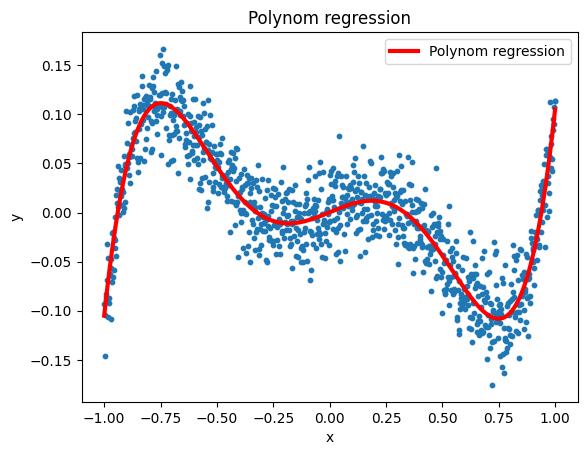

R2: 84.51%


In [13]:
#I stället kan vi göra en polynomial regression. Vi kan använda numpy för att göra detta.

min_model = np.poly1d(np.polyfit(x, y, deg=5)) #deg=5 betyder att vi vill ha ett femtegradspolynom

plt.scatter(x, y, s=10)
plt.plot(x, min_model(x), color='red', linewidth=3, label='Polynom regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynom regression')
plt.legend()
plt.show()

r2 = r2_score(y, min_model(x))
print(f"R2: {r2*100:.2f}%") #R2 är ett mått på hur bra modellen är, 100% är perfekt.


**Varning**: Modellen är bara anpassad till det intervallet som vi har *x* och *y* värden för. 
Om sambandet förändras utanför dessa intervall kommer vår modell att mislyckas.

In [14]:
# Prediktera utanför intervallet
print(min_model(2))
print(min_model(-2))


24.299094217166477
-24.436636920990075


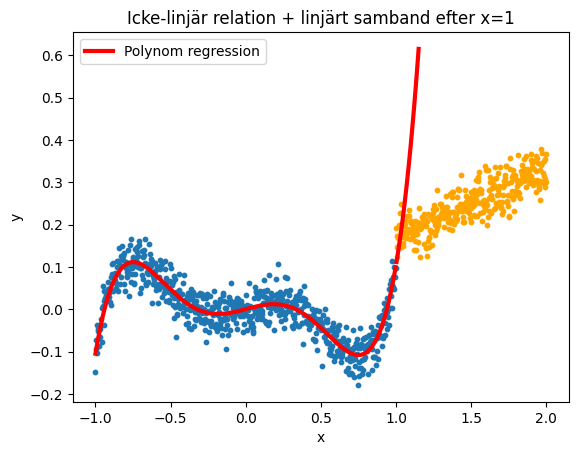

In [15]:
#Linjärt samband för x > 1
x = np.linspace(-1, 2, n)
#En icke-linjär relation. Ett femtegradspolynom
y = (x**5 - x**3 + x/10 + np.random.normal(0, 0.03, n)) * (x < 1) + (x/6 + np.random.normal(0, 0.03, n)) * (x >= 1)

#Gör prediktioner med min modell
y_pred = min_model(x)

plt.scatter(x[x<1], y[x<1], s=10)
plt.scatter(x[x>=1], y[x>=1], s=10, color='orange')
plt.plot(x[x<1], y_pred[x<1], color='red', linewidth=3)
plt.plot(x[x>1][:50], y_pred[x>1][:50], color='red', linewidth=3, label='Polynom regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Icke-linjär relation + linjärt samband efter x=1')
plt.show()


### Tredje fallet: vi har fler än två variabler.

Dvs. vi har fler än två variabler som vi har observerat, kanske är det många mått på en bil som volym, vikt, co2-utsläpp där vi vill prediktera priset på bilen.

In [16]:
data = pd.read_csv('data_bilar.csv')


In [17]:
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


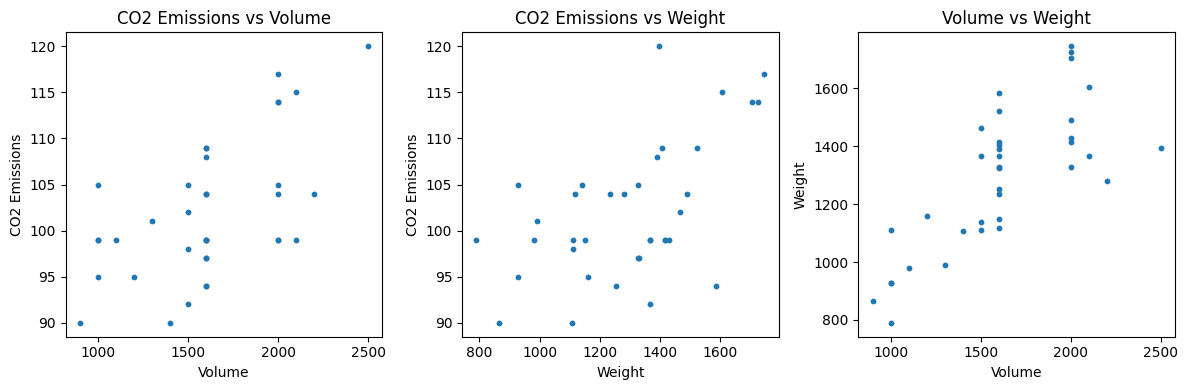

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(data['Volume'], data['CO2'], s=10)
plt.xlabel('Volume')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Volume')
plt.subplot(132)
plt.scatter(data['Weight'], data['CO2'], s=10)
plt.xlabel('Weight')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Weight')
plt.subplot(133)
plt.scatter(data['Volume'], data['Weight'], s=10)
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.title('Volume vs Weight')
plt.tight_layout()

In [19]:
#Vi kan göra en multidimensionell linjär regression för att se om det finns något samband mellan volym och vikt och CO2-utsläpp
lin_model = LinearRegression()

X = data[['Weight', 'Volume']]
y = data['CO2']

#Träna modellen
lin_model.fit(X, y)

#Prediktera
y_pred = lin_model.predict(X)


In [20]:
#Hur ser koefficienterna ut?
print(lin_model.coef_)

[0.00755095 0.00780526]


* Dessa värden visar att om vikten ökar med 1 kg, ökar CO2-utsläppen med 0,00755095 g.

* Och om motorstorleken (volymen) ökar med 1 cm³, ökar CO2-utsläppen med 0,00780526 g.

In [21]:
#Låt oss prediktera CO2-utsläpp för en bil som väger 1500 kg och har en volym på 1500 kubikcentimeter eller 1.5 liter.
print(lin_model.predict([[1500, 1500]]))

#Det vill säga: en bil som väger 1500 kg och har en volym på 1500 kubikcentimeter släpper ut 102.7 gram CO2 per kilometer.


[102.72902649]


C:\Users\fredr\miniconda3\envs\riseenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
#Öka bilens vikt med 1000 kg och volymen med 1000 kubikcentimeter
print(lin_model.predict([[2500, 2500]]))


[118.08523129]


C:\Users\fredr\miniconda3\envs\riseenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Låt oss arbeta med ett till dataset. Denna gång ska vi använda oss av en dataset som innehåller information om fiskar, såsom vikt, längd, bredd och höjd. Vi ska använda oss av denna data för att förutsäga vikten på fisken.

* https://www.kaggle.com/datasets/vipullrathod/fish-market/data

In [23]:
data = pd.read_csv('data_fisk.csv')


In [24]:
data.head(4)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


* Length1: Den här kolumnen representerar den första mätningen av fiskens längd. Det är en numerisk variabel som vanligtvis mäts i centimeter.

* Length2: Den här kolumnen representerar den andra mätningen av fiskens längd. Det är ytterligare en numerisk variabel som vanligtvis mäts i centimeter.

* Length3: Den här kolumnen representerar den tredje mätningen av fiskens längd. Liksom de föregående två kolumnerna är det en numerisk variabel som vanligtvis mäts i centimeter.

* Height: Den här kolumnen representerar fiskens höjd. Det är en numerisk variabel som vanligtvis mäts i centimeter.

* Width: Den här kolumnen representerar fiskens bredd. Liksom de andra numeriska variablerna mäts den vanligtvis i centimeter.

In [25]:
data.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
species=data['Species'].unique()
print(species)


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [27]:
#Visualisera data för en specifik fiskart
fisktyp = 'Pike'

fisk = data[data['Species'] == fisktyp]

fisk = fisk.drop(columns='Species')

#Korrelationsmatris - ett sätt att visualisera hur mycket två variabler är korrelerade med varandra.
corr = fisk.corr().round(4)
corr.style.background_gradient(cmap='coolwarm')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.972000,0.974100,0.979000,0.936500,0.919700
Length1,0.972000,1.000000,0.999800,0.998500,0.953400,0.932700
Length2,0.974100,0.999800,1.000000,0.998900,0.955500,0.936200
Length3,0.979000,0.998500,0.998900,1.000000,0.953100,0.941400
Height,0.936500,0.953400,0.955500,0.953100,1.000000,0.966700
Width,0.919700,0.932700,0.936200,0.941400,0.966700,1.000000


Vi kan göra en linjär regression för att vi ser att det finns ett samband mellan variablerna här

In [28]:
#Låt oss transformera species till numeriska värden. 
#Detta kallas för en "one-hot encoding" och är vanligt för kategoriska variabler.

data = pd.get_dummies(data, columns=['Species'])


In [29]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


Vanligtvis för att undvika överträning delar vi upp datan i en träningsdel och en testdel. Så vi kan se hur bra modellen är på data den inte har sett.

* Mer Generell modell
* Inte överanpassad - dvs. kan funka för data som den inte är anpassad till

In [30]:
from sklearn.model_selection import train_test_split

y = data['Weight'] #Detta är det vi vill prediktera
X = data.drop('Weight', axis=1) #Vi tar bort Weight från X eftersom det är det vi vill prediktera


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Vi delar upp datan i en träningsdel och en testdel (80% träningsdata, 20% testdata)


In [31]:
#Träna modellen
lin_model.fit(X_train, y_train)

#Prediktera
y_pred = lin_model.predict(X_test)

#Hur bra är modellen?
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2*100:.2f}%") #R2 är ett mått på hur bra modellen är, 100% är perfekt.

R2: 95.07%


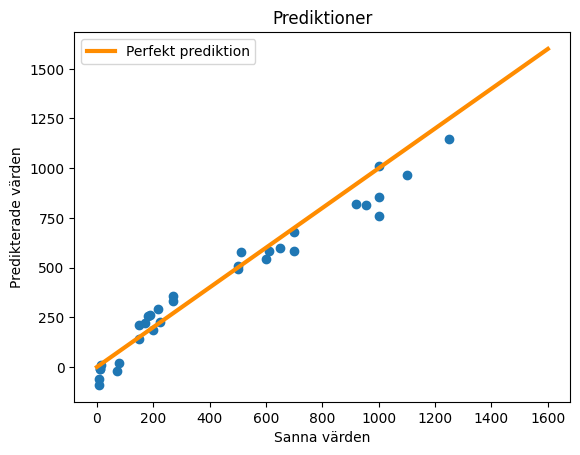

In [32]:
#visualisera prediktionerna
plt.scatter(y_test, y_pred)
plt.plot([0, 1600], [0, 1600], color='darkorange', linewidth=3, label='Perfekt prediktion')
plt.xlabel('Sanna värden')
plt.ylabel('Predikterade värden')
plt.legend()
plt.title('Prediktioner')
plt.show()

In [33]:
#### För enstaka prediktioner. Ta ut en rad från X_test och prediktera
i = 2

print(X_test.iloc[i])

print(f"--------------------------")
print(f"Sant värde: {y_test.iloc[i]}")
print(f"Prediktion: {lin_model.predict([X_test.iloc[i]])[0]}")


Length1                30.0
Length2                32.3
Length3                34.8
Height                5.568
Width                3.3756
Species_Bream         False
Species_Parkki        False
Species_Perch         False
Species_Pike           True
Species_Roach         False
Species_Smelt         False
Species_Whitefish     False
Name: 128, dtype: object
--------------------------
Sant värde: 200.0
Prediktion: 187.711280945716


C:\Users\fredr\miniconda3\envs\riseenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Det finns otroligt många metoder och tekniker för att göra maskininlärning. Och linjär regression är bara en, men det är en bra startpunkt. 
I fallen ovan har vi arbetat med enkla regression och flerdimensionell regression (multidimensionell regression) exempel.exec

Låt oss nu titta på en annan typ av maskininlärning, nämligen klassificering. Att klassificera något, som sant eller falskt, rött eller blått, är en annan typ av problem som maskininlärning kan lösa.

Även här finns det massvis av modeller, men vi kommer att titta på ett exempel med en beslutsträdmodell.

Ett beslutsträd är som en serie "ja" och "nej"-frågor som hjälper oss att komma fram till ett beslut. Det fungerar ungefär som ett flödesschema.

Modellen hittar den bästa kombinationen av funktioner för att skapa en serie frågor som bäst delar in datan i de olika klasserna. Funkar för både regression och klassificering.

https://scikit-learn.org/stable/modules/tree.html

Låt oss testa att klassificera vilken djurart det finns på ett zoo, givet ett antal kategoriska variabler såsom: giftighet, kan flyga m.m

De 7 klasserna är: Däggdjur, Fågel, Reptil, Fisk, Groddjur, Insekt och Ryggradslös.
    
https://www.kaggle.com/datasets/uciml/zoo-animal-classification/data    

In [35]:
class_data = pd.read_csv("data_zoo_class.csv")
zoo_data = pd.read_csv("data_zoo.csv")

In [36]:
zoo_data.head(4)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [37]:
class_data.head(7)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [38]:
X = zoo_data.iloc[:, 1:-1]
y = zoo_data.iloc[:, -1]

print(X.shape)
print(y.shape)

(101, 16)
(101,)


Vi väljer att ha 70% av datan till träning och 30% av datan till testning.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(70, 16)
(31, 16)


In [40]:
from sklearn.tree import DecisionTreeClassifier

#Skapa en beslutsträd som klassificerare
dt = DecisionTreeClassifier()

#Träna modellen
dt.fit(X_train, y_train)

#Prediktera
y_pred = dt.predict(X_test)


Hur bra lyckas modelen att välja vilken klass djuren tillhör?


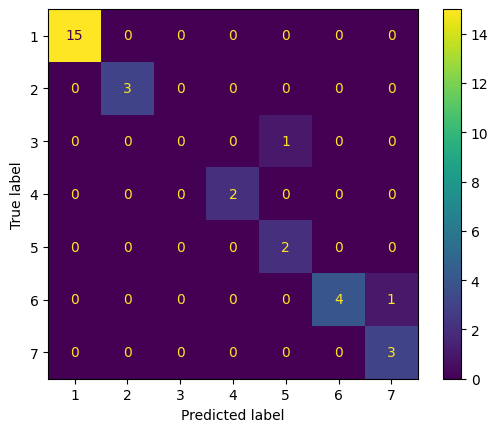

In [41]:
# Visualisera via en konfusionsmatris / förvirringsmatris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

In [42]:
#Träffsäkerhet
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Träffsäkerhet: {accuracy*100:.2f}%")

Träffsäkerhet: 93.55%


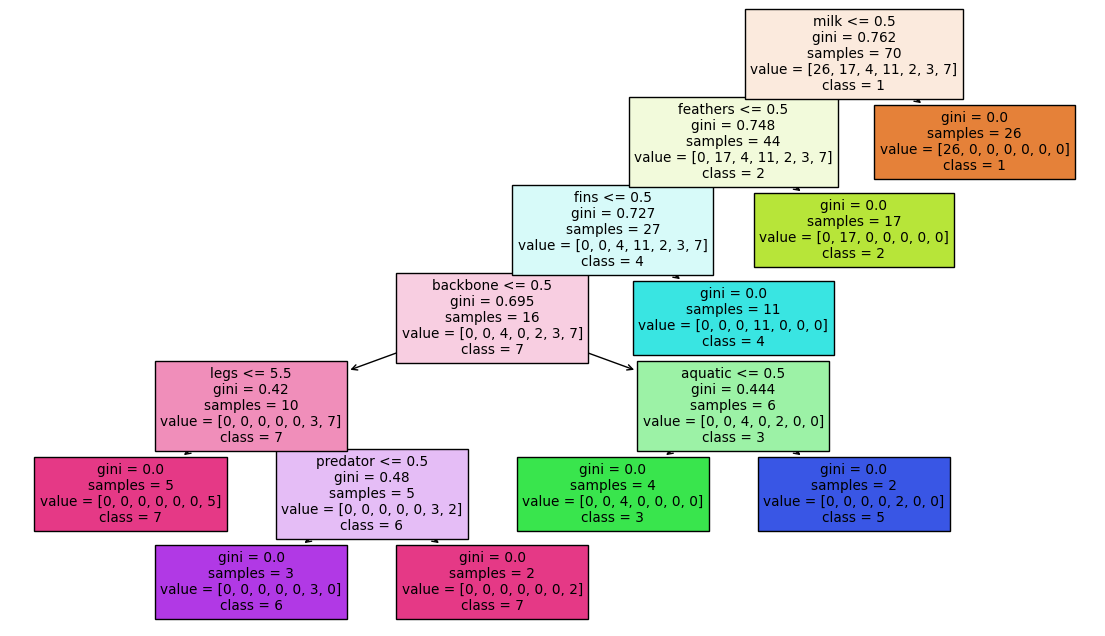

In [43]:
#Visualisera beslutsträdet
from sklearn.tree import plot_tree

# Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

plt.figure(figsize=(14, 8))
plot_tree(dt, filled=True, class_names=[str(i) for i in dt.classes_], feature_names=X.columns)
plt.show()

Verkar som att bäst är att först separera på "milk", sedan "feathers" och sedan "fins".